# Traffic Stop Activity Result: Citation vs. Warning 

#### BA 590 Capstone: Business Analytics Applications - Proposal
#### Proposed By: Kendall Stopa
1.	Project Background/Motivation
    - Millions of Americans are stopped each year due to traffic violations. There are many reasons as to why one would be pulled over such as speeding, using a cellphone, not wearing a seatbelt, etc. What I want to know is what dictates the end result of a traffic stop? 

2.	Problem Statement/Statement of Work
    - What features are most strongly associated with an activity result of a citation or a warning?  

3.	 Preliminary Results/Exploratory Data Analysis (see figures on page 2-3)
    - The dataset that I will be using is information available in the Louisville Metro Police Department Vehicle Stops Database for 2015 – 2018, obtained from Data.gov. There are 111,582 rows and 18 columns in this dataset. 

4.	Planning Timeline with Milestones (start and end dates) for each phase of the project
    - EDA and Preprocessing &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 5/18 – End: 5/21
    - Modeling &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 5/22 – End: 6/01
    - Geo coding &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 6/03 – End: 6/15
    - Concluding Project &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 6/17 – End: 6/23

5.	Summary of expected results
    - The expected result of this analytical project is to build multiple classification models commonly used machine learning algorithms to predict the activity result one would receive during a traffic stop and determine the most accurate predictive model to use for this data. To see which features of a traffic stop have the largest impact on predicting the activity result of a traffic stop I will be using feature selection. I will also be geocoding the location of each traffic stop to explore this data spatially and create a visualization where the activity result was given. 


6.	 Signoff from your advisor and your subject matter expert: 
    - Dr. Christopher Huntly
    - Mike Garvey (Alumni Class of ’89, 20 years Rockland County Police Department)




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#importing packages we know we will need upfront
import seaborn as sns

from scipy.stats import iqr

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('LMPDStopsDatFrame.csv', index_col=0)
df.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3,NaN,NaN,WARNING,NaN,NaN,NaN,2016-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,NaN,NaN,WARNING,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,NaN
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


# EDA #

In [4]:
df.shape

(111582, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111582 entries, 0 to 111581
Data columns (total 18 columns):
ID                         111582 non-null int64
TYPE_OF_STOP               111455 non-null object
CITATION_CONTROL_NUMBER    94158 non-null object
ACTIVITY RESULTS           111582 non-null object
OFFICER_GENDER             111426 non-null object
OFFICER_RACE               111426 non-null object
OFFICER_AGE_RANGE          109086 non-null object
ACTIVITY_DATE              111582 non-null object
ACTIVITY_TIME              111548 non-null object
ACTIVITY_LOCATION          111443 non-null object
ACTIVITY_DIVISION          111189 non-null object
ACTIVITY_BEAT              111163 non-null object
DRIVER_GENDER              111546 non-null object
DRIVER_RACE                111550 non-null object
DRIVER_AGE_RANGE           111554 non-null object
NUMBER OF PASSENGERS       111582 non-null int64
WAS_VEHCILE_SEARCHED       111579 non-null object
REASON_FOR_SEARCH          6922 non-null o

In [6]:
df.isnull().sum()

ID                              0
TYPE_OF_STOP                  127
CITATION_CONTROL_NUMBER     17424
ACTIVITY RESULTS                0
OFFICER_GENDER                156
OFFICER_RACE                  156
OFFICER_AGE_RANGE            2496
ACTIVITY_DATE                   0
ACTIVITY_TIME                  34
ACTIVITY_LOCATION             139
ACTIVITY_DIVISION             393
ACTIVITY_BEAT                 419
DRIVER_GENDER                  36
DRIVER_RACE                    32
DRIVER_AGE_RANGE               28
NUMBER OF PASSENGERS            0
WAS_VEHCILE_SEARCHED            3
REASON_FOR_SEARCH          104660
dtype: int64

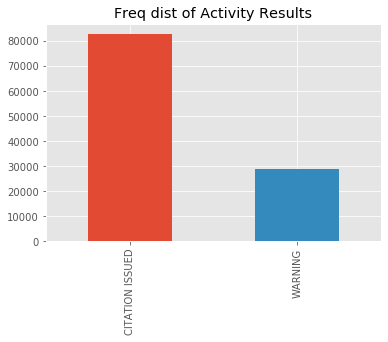

In [7]:
df['ACTIVITY RESULTS'].value_counts().plot.bar(title="Freq dist of Activity Results")

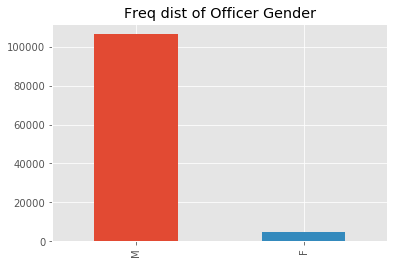

In [8]:
df['OFFICER_GENDER'].value_counts().plot.bar(title="Freq dist of Officer Gender")

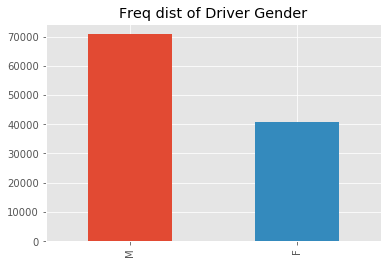

In [9]:
df['DRIVER_GENDER'].value_counts().plot.bar(title="Freq dist of Driver Gender")

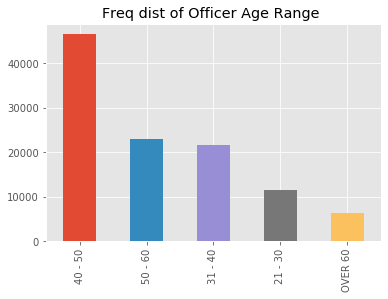

In [10]:
df['OFFICER_AGE_RANGE'].value_counts().plot.bar(title="Freq dist of Officer Age Range ")

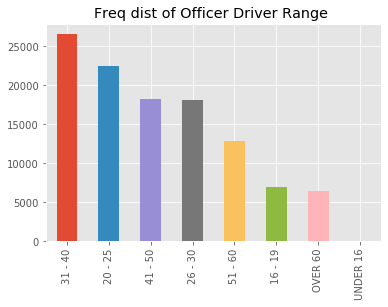

In [11]:
df['DRIVER_AGE_RANGE'].value_counts().plot.bar(title="Freq dist of Officer Driver Range ")

Text(0.5, 1.0, 'Officer Age versus Activity Result')

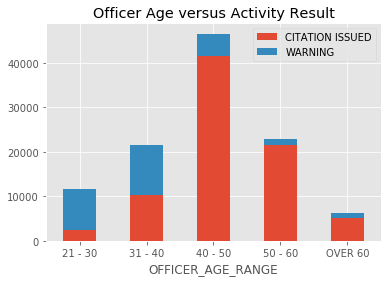

In [12]:
test7 = df.groupby(['OFFICER_AGE_RANGE', 'ACTIVITY RESULTS'])['DRIVER_AGE_RANGE'].count().unstack('ACTIVITY RESULTS').fillna(0)
test7.plot(kind='bar', stacked=True)
plt.xticks(rotation='horizontal')
plt.legend()
plt.title('Officer Age versus Activity Result')

Text(0.5, 1.0, 'Driver Age versus Activity Result')

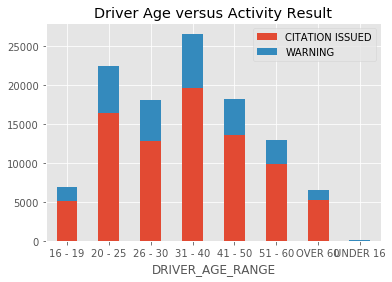

In [13]:
test7 = df.groupby(['DRIVER_AGE_RANGE', 'ACTIVITY RESULTS'])['DRIVER_AGE_RANGE'].count().unstack('ACTIVITY RESULTS').fillna(0)
test7.plot(kind='bar', stacked=True)
plt.xticks(rotation='horizontal')
plt.legend()
plt.title('Driver Age versus Activity Result')

Text(0.5, 1.0, 'Driver Gender versus Activity Result')

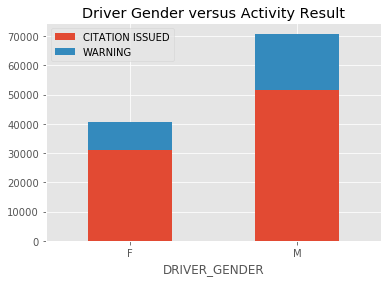

In [14]:
test7 = df.groupby(['DRIVER_GENDER', 'ACTIVITY RESULTS'])['DRIVER_GENDER'].count().unstack('ACTIVITY RESULTS').fillna(0)
test7.plot(kind='bar', stacked=True)
plt.xticks(rotation='horizontal')
plt.legend()
plt.title('Driver Gender versus Activity Result')

In [15]:
df['ACTIVITY_DIVISION'].unique()

array([nan, '2ND DIVISION', '3RD DIVISION', '5TH DIVISION',
       '4TH DIVISION', '6TH DIVISION', '7TH DIVISION', '8TH DIVISION',
       '1ST DIVISION', 'NON LMPD', ' '], dtype=object)